In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import random
import time


/home/matti/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
N=512
rho1 = np.ones((N,N,N),dtype=float);
a = np.sum(rho1)
print(a)

134217728.0


In [22]:
def f(n):
    c=0
    while(n >= 0):
        n = n - 2
        c = c + n - 2
    return c
    
for i in range(1,10):
    if i%2!=0:
        print(i,f(i-2)<f(i))

1 False
3 False
5 True
7 True
9 True


13293
5001
1.3235294117647061e-05


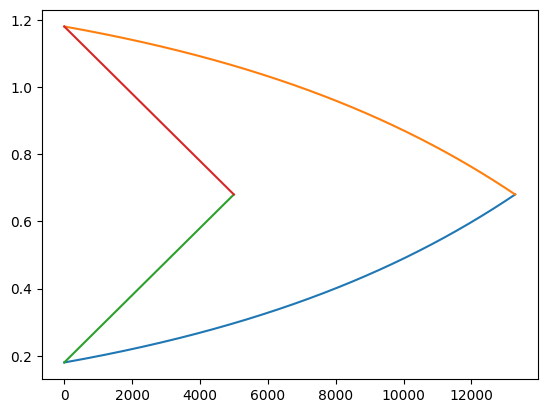

In [47]:
rho1 = 0.1
rho2 = 1.1
push_fac = 0.01
ratio_max = 0.5
rho_tot = rho1 + rho2;
rho1_0 = rho1
rho2_0 = rho2

def original(push_fac):
    rho1s = []
    rho2s = []
    f1 = rho1
    f2 = rho2
    ratio = rho1 / ( rho1 + rho2 ) 
    while (ratio < ratio_max):
        f2 = f2 * (1 - push_fac*f1/f2)
        f1 = f1 * (1 + push_fac)
        ratio = f1 / ( f1 + f2 ) 
        rho1s.append(f1)
        rho2s.append(f2)
    return (np.array(rho1s), np.array(rho2s))

def new(push_fac):
    rho1s = []
    rho2s = []
    f1 = rho1
    f2 = rho2
    ratio = rho1 / ( rho1 + rho2 ) 
    while (ratio < ratio_max):
        r = f1/f2
        f2 = f2 - push_fac
        f1 = f1 + push_fac
        ratio = f1 / ( f1 + f2 )
        rho1s.append(f1)
        rho2s.append(f2)
    return (np.array(rho1s), np.array(rho2s))

o1, o2 = original(push_fac)
n1, n2 = new(push_fac)
print(push_fac*rho1/rho_tot)
plt.plot(o1)
plt.plot(o2)
plt.plot(n1)
plt.plot(n2)

[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.]


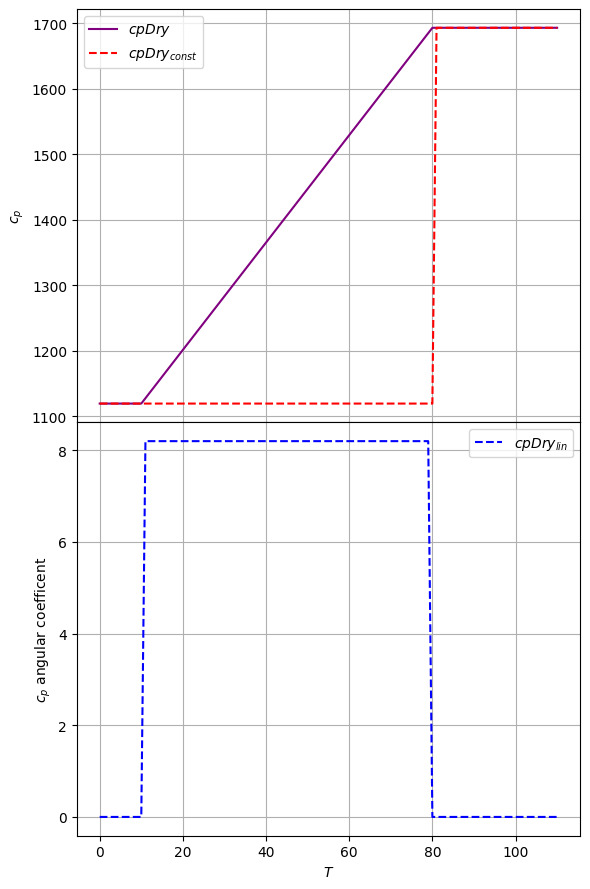

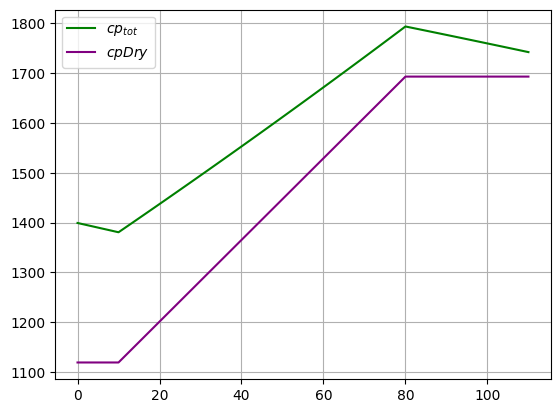

In [75]:
CpDryAtT_Min = 1119;
CpDryAtT_Max = 1693;
CpH2O = 4200;
T_Min = 20;
T_Max = 90;

T = np.linspace(10,120,111)
print(T)
x = np.linspace(0.1,0.02,111)

# first make linear function
CpDry     = CpDryAtT_Min + (T-T_Min)*(CpDryAtT_Max-CpDryAtT_Min)/(T_Max-T_Min);

#limit linear part
CpDry[T>T_Max] = CpDryAtT_Max;
CpDry[T<T_Min] = CpDryAtT_Min;

#Cp_const is the min if T<T_max and is the max if T>T_max
Cp_const = np.copy(CpDry);
Cp_const[T<=T_Max] = CpDryAtT_Min;
#Cp_lin is the angular coefficent of the linear interpolation between T_Min and T_Max, elsewhere is zero.
Cp_lin = np.zeros(len(T));
Cp_lin[(T<T_Max) & (T>T_Min)] = (CpDryAtT_Max - CpDryAtT_Min) / (T_Max - T_Min);

#calculate Cp mixture based on mass fraction
y = x/(1+x)*CpH2O  +  1/(1+x)*CpDry;

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 9), gridspec_kw={'hspace': 0})
ax1.plot(CpDry,color='purple',label=r'$cpDry$')
ax1.plot(Cp_const,'--',color='red',label=r'$cpDry_{const}$')
ax1.set_ylabel(r'$c_p$')
ax1.grid(True)
ax1.legend()
ax2.plot(Cp_lin,'--',color='blue',label=r'$cpDry_{lin}$')
ax2.set_ylabel(r'$c_p$ angular coefficent')
ax2.set_xlabel(r'$T$')
ax2.legend()
ax2.grid(True)
plt.tight_layout()

plt.figure(4)
plt.plot(y,color='green',label=r'$cp_{tot}$')
plt.plot(CpDry,color='purple',label=r'$cpDry$')
plt.grid(True)
plt.legend()

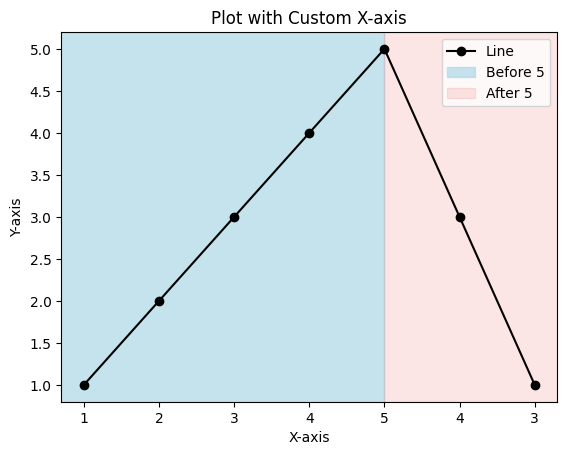

In [23]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]
custom_x_labels = [1, 2, 3, 4, 5, 4, 3]

y = [1, 2, 3, 4, 5, 3, 1]

plt.plot(x, y, color='black', marker='o', label="Line")

plt.axvspan(0, 5, color='lightblue', alpha=0.7, label="Before 5")
plt.axvspan(5, 8, color='lightcoral', alpha=0.2, label="After 5")

plt.xticks(ticks=x, labels=custom_x_labels)
#plt.xlim(min(x), max(x))  # This ensures that the x-axis spans the range of the x data

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Plot with Custom X-axis")
plt.legend()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

N=10000;
vmag=1;
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)
a = np.zeros(N)
b = np.zeros(N)
ac = np.zeros(N)
bc = np.zeros(N)

for i in range(N):
    a[i] = np.pi*0.5*np.random.rand()
    b[i] = np.pi*2*np.random.rand()
    vx[i] = vmag*np.sin(a[i])*np.cos(b[i])
    vy[i] = vmag*np.cos(a[i])
    vz[i] = vmag*np.sin(a[i])*np.sin(b[i])
    ac[i] = np.atan(vy[i]/vz[i])
    bc[i] = np.atan(vz[i]/vx[i])

print(a-ac)

[2.05882308 1.66437428 1.5708349  ... 1.71309515 1.57165643 1.57247124]


/home/matti/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


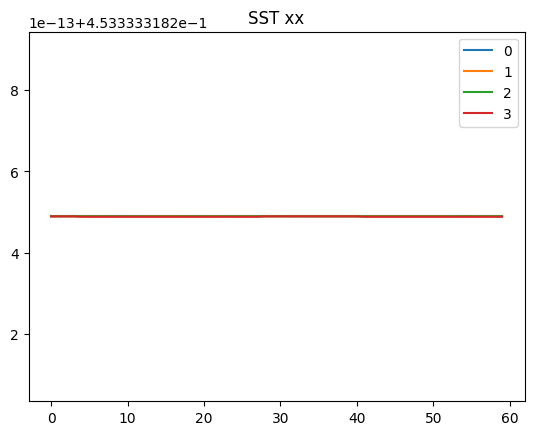

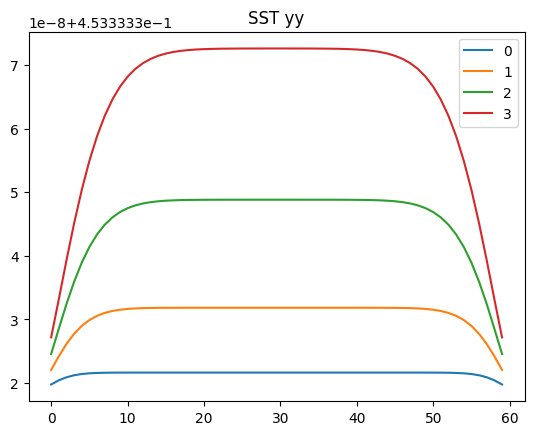

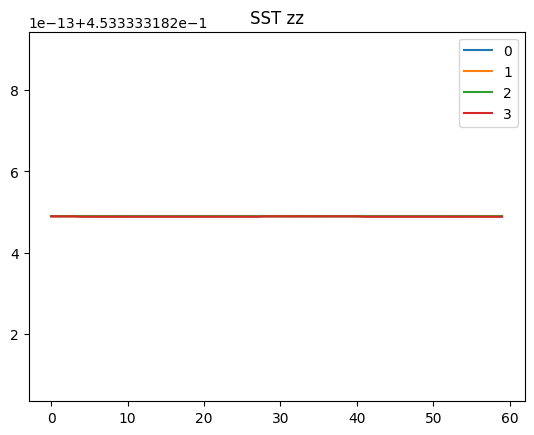

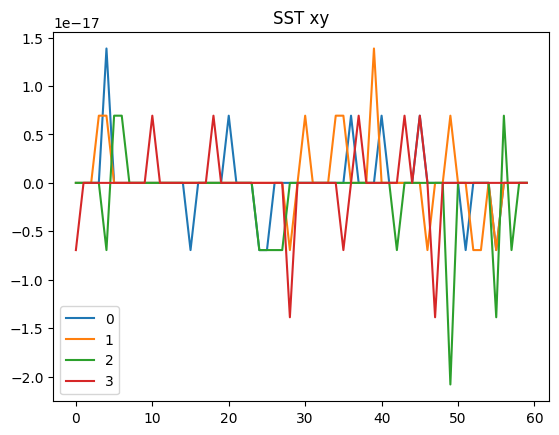

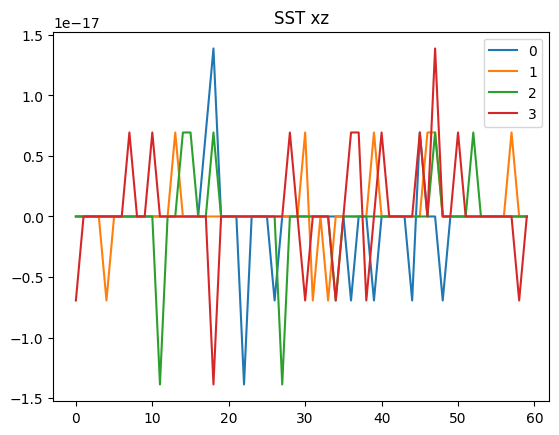

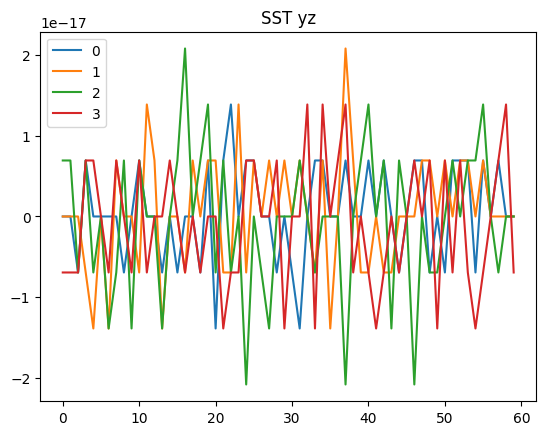

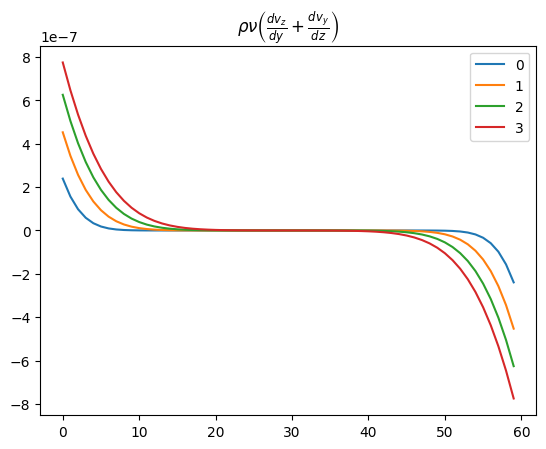

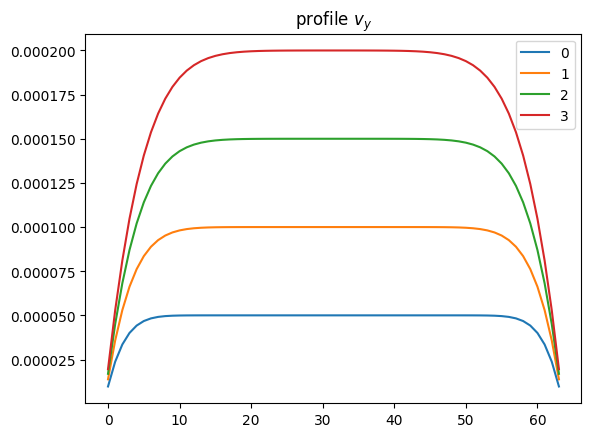

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def comp_nu(tau):
    return (tau-0.5)/3.0

rho1=0.18
rho2=1.18
tau1=1
tau2=1
nu1=comp_nu(tau1)
nu2=comp_nu(tau2)

direc = "/home/matti/programming/lbe-direct/src/tests/SCMP_POISEUILLE_SHEARSTRESSTENSOR/"

with open(direc+"sst_xx.dat", 'r') as f:
    SSTxx = np.loadtxt(f)
with open(direc+"sst_xy.dat", 'r') as f:
    SSTxy = np.loadtxt(f)
with open(direc+"sst_xz.dat", 'r') as f:
    SSTxz = np.loadtxt(f)
with open(direc+"sst_yy.dat", 'r') as f:
    SSTyy = np.loadtxt(f)
with open(direc+"sst_yz.dat", 'r') as f:
    SSTyz = np.loadtxt(f)
with open(direc+"sst_zz.dat", 'r') as f:
    SSTzz = np.loadtxt(f)
with open(direc+"grad_v_sum.dat", 'r') as f:
    gradvsum = np.loadtxt(f) * (rho1*nu1)
with open(direc+"vy_along_z.dat", 'r') as f:
    vy = np.loadtxt(f)

N = len(gradvsum[:,0])

def ppp(i, f, name):
    plt.figure(i)
    for j in range(N):
        plt.plot(f[j,:], label="%d"%j)
    plt.title(name)
    plt.legend()


ppp(1, SSTxx[:,2:-2], "SST xx")
ppp(4, SSTyy[:,2:-2], "SST yy")
ppp(6, SSTzz[:,2:-2], "SST zz")
ppp(2, SSTxy[:,2:-2], "SST xy")
ppp(3, SSTxz[:,2:-2], "SST xz")
ppp(5, SSTyz[:,2:-2], "SST yz")
ppp(100, gradvsum, r"$\rho\nu\left(\frac{dv_z}{dy}+\frac{dv_y}{dz}\right)$")
ppp(200, vy, r"profile $v_y$")
